C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27912\1878338217.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27912\1878338217.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Accuracy: 0.7821229050279329
Confusion Matrix:
 [[83 22]
 [17 57]]


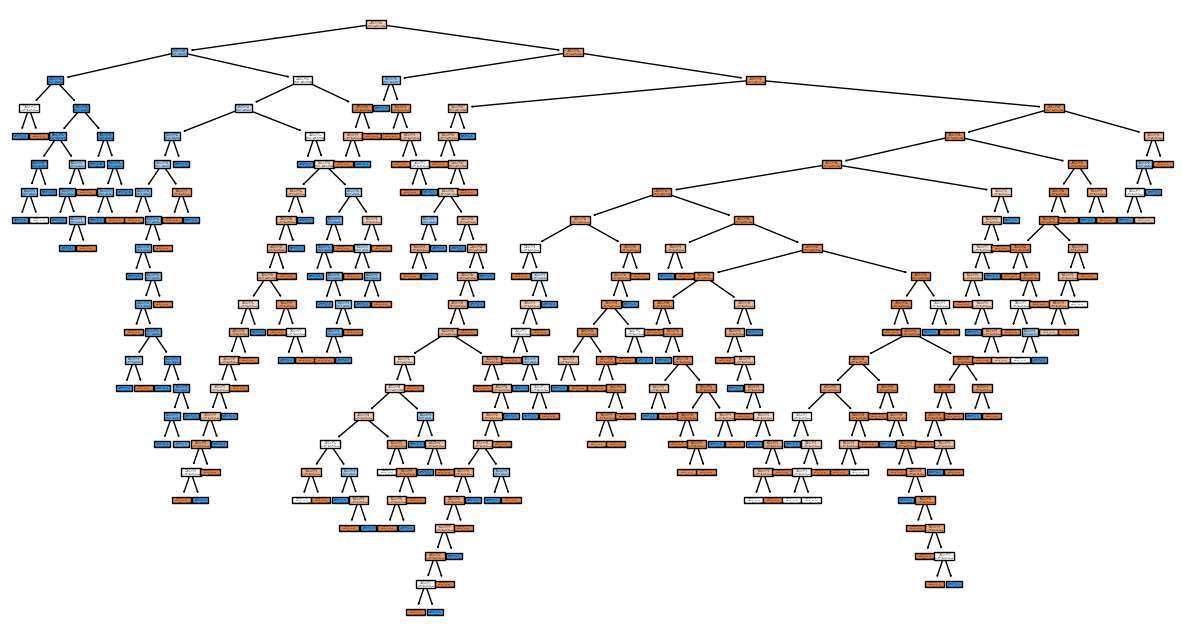

In [ ]:
'''
Decision Tree on Titanic Dataset
● Load Titanic dataset (or use a similar dataset).
● Preprocess (handle missing values, encode categorical variables).
● Train a DecisionTreeClassifier.
● Visualize the decision tree using plot_tree.
● Evaluate the model using accuracy and confusion matrix

'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])
le_embarked = LabelEncoder()
df["embarked"] = le_embarked.fit_transform(df["embarked"])

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


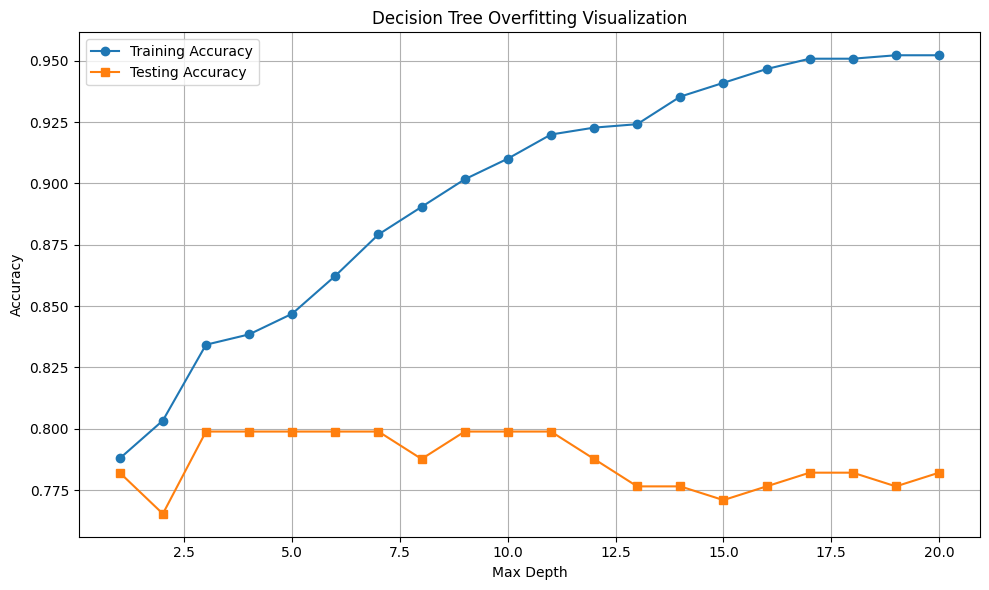

In [ ]:
'''
● Use parameters like:
○ max_depth
○ min_samples_split
● Show how performance changes.
● Plot training vs testing accuracy to visualize overfitting.

'''

X = df.drop("survived", axis=1)
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=4, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(depths, test_accuracies, label="Testing Accuracy", marker="s")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Visualization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()